## Данный файл предназначен для того, чтобы разобраться как строить графики по данным из файлов .csv

`Ниже будут представлены полезные ссылки, которые мне помогали с составлением этого файла.`

---> https://pythonru.com/primery/pandas-na-primerah 
-Работа с pandas

---> https://ru.hexlet.io/courses/python-pandas/lessons/index-rules/theory_unit 
-Работа с индексами в pandas

--> https://sky.pro/wiki/pythonustranyaem-indeks-stolbets-v-pandas-csv-bez-key-error/ 
-Устраняем индекс-столбец в pandas CSV: без KeyError

---> https://www.codecamp.ru/blog/drop-index-pandas/ 
-Как удалить столбец индекса в Pandas (с примерами)

---> https://www.youtube.com/watch?v=LLFOZ2vN7ss&t=902s 
-Как оформить текст в Jupyter Notebook с помощью Markdown

### 4.3 Настройка усилителя мощности

In [318]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

In [319]:
# Считаем данные из CSV-файла 
# ctrl + / - закомментировать кусок кода
data = pd.read_csv('11eksp.csv', index_col= False) # Чтение файла в переменную data

```python
 index_col= False  # сбрасывает индекс при импорте!
``` 
#### `Удалять столбец индекса нужно для корректного соответствия данных !`

### Посмотрим как отображается наша таблица. Выведем её верхнюю часть

In [320]:
data.head()

,Time [s],CH1 [V],CH2 [V]
0,2.000000e-09,-0.008,0.32
1,2.000000e-09,-0.002,0.18
2,2.000000e-09,0.006,0.06
3,2.000000e-09,0.024,-0.06
4,2.000000e-09,0.040,-0.16


В столбце CH2 [V];;;;;; присутствуют лишние символы (;;;;;;), которые могут мешать правильному извлечению данных._

`Код ниже демонстрирует как можно убрать лишнии символы из столбцов и строк таблицы 
.csv`

In [321]:
# Убираем лишние символы из названий столбцов
data.columns = data.columns.str.replace(r';+', '', regex=True)
# Удаляем лишние символы в строках данных
data = data.replace(r';+', '', regex=True)
# Теперь названия столбцов корректны: 'Time [s]', 'CH1 [V]', 'CH2 [V]'

### Проверим как теперь отображается .csv таблица

In [322]:
data.head()

,Time [s],CH1 [V],CH2 [V]
0,2.000000e-09,-0.008,0.32
1,2.000000e-09,-0.002,0.18
2,2.000000e-09,0.006,0.06
3,2.000000e-09,0.024,-0.06
4,2.000000e-09,0.040,-0.16


In [323]:
print(data['CH1 [V]'].head(10))  # Проверим первые 10 значений CH2 после очистки
print(data['CH2 [V]'].head(10))  # Проверим первые 10 значений CH2 после очистки

0   -0.008
1   -0.002
2    0.006
3    0.024
4    0.040
5    0.056
6    0.072
7    0.078
8    0.078
9    0.080
Name: CH1 [V], dtype: float64
0    0.32
1    0.18
2    0.06
3   -0.06
4   -0.16
5   -0.24
6   -0.30
7   -0.34
8   -0.38
9   -0.42
Name: CH2 [V], dtype: float64


#### Полученные данные соответствуют своим столбцам, значит можно переходить к построению графиков

### Построение данных

In [324]:
discrete_time = 2.000000e-09 # значение дискрета по времени, взятое из таблицы csv

# Создание вектора времени
time = np.arange(0, 100 * discrete_time, discrete_time)
# Перевод времени в наносекунды (умножаем на 10^9)
time_ns = time * 1e9

# Извлечение данных из столбцов CH1 и CH2

ch1 = 9 + 100 * data.iloc[0:100]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца CH1 [V]
ch2 = 0.470 + data.iloc[0:100]['CH2 [V]']


#display(ch1.iloc[1000]) # iloc() — метод выбора строк согласно их числовой позиции
                        #loc() — метод выбора данных на основе меток строк


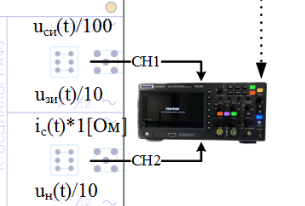 

Так как в 1 канале осциллографа показывается  $Uси / 100$, следовательно все значения нужно умножить на 100, чтобы получить правильные данные в вольтах. __Необходимо прибавить постоянную составляющую 9 В, т.к. её не учитывают данные в таблице csv.__

$Iс$ снимается с 2 канала сразу в амперах сразу в верных значениях, __но необходимо прибавить постоянную составляющую 0.52 А__

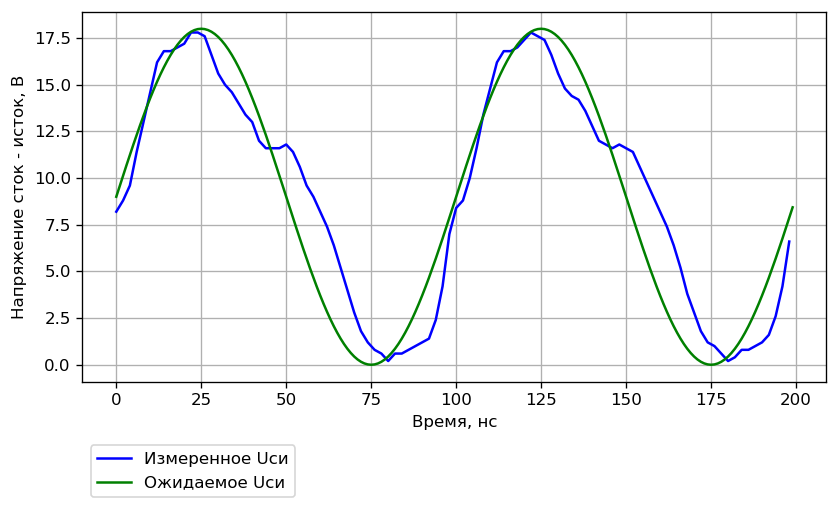

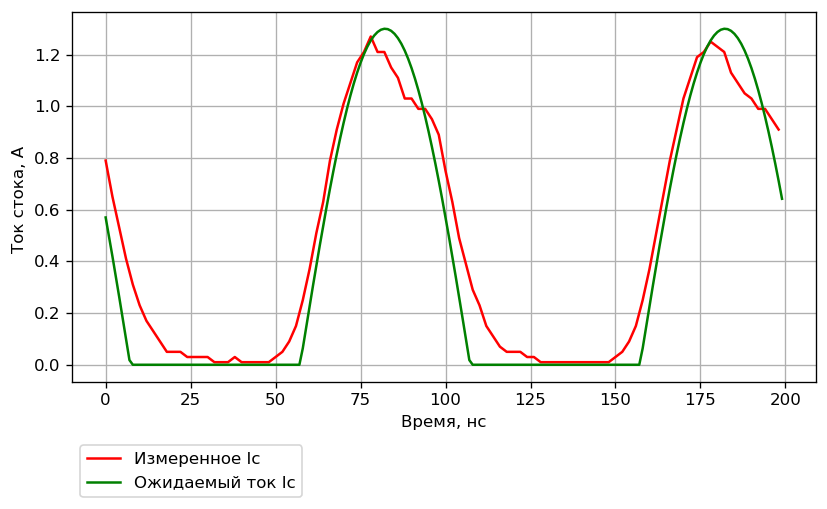

In [325]:
# Параметры
frequency = 10e6  # Частота в Гц (10 МГц)
sampling_rate = 1e9  # Частота дискретизации в Гц (например, 100 МГц)
t = np.arange(0, 2e-7, 1/sampling_rate)  # Временная ось (длительность 0.2 мкс/ 200нс)
t_ns = t * 1e9  # Перевод времени в наносекунды (умножаем на 10^9)
amplitude_current = 1.3
amplitude_Uc = 9  # Амплитуда в вольтах

Icin = np.sin(2 * np.pi * frequency * t + 154*(np.pi/180))
Icout = amplitude_current * Icin * (Icin > 0)

sinusoid_Uc = 9 + amplitude_Uc * np.sin(2 * np.pi * frequency * t) # Синусоида


# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)

new_xticks = np.arange(0, 201, 25)  # Задаем метки от 25 до 200 наносекунд с шагом 25 нс

# Осциллограмма для CH1
plt.plot(time_ns, ch1, label='Измеренное Uси', color='blue')
plt.plot(t_ns, sinusoid_Uc, label='Ожидаемое Uси', color='green')
plt.xlabel('Время, нс')
plt.ylabel('Напряжение сток - исток, В')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.grid(True)
plt.xticks(new_xticks)
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH2
plt.plot(time_ns, ch2, label='Измеренное Ic', color='red')
output_current = amplitude_current * (np.sin(2 * np.pi * frequency * t) * (np.sin(2 * np.pi * frequency * t) > 0))  # Положительная полуволна
plt.plot(t_ns, Icout, label='Ожидаемый ток Ic', color='green')

plt.xlabel('Время, нс')
plt.ylabel('Ток стока, А ')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.grid(True)
plt.xticks(new_xticks)
plt.show()


### 4.4 Нагрузочные характеристики

### Недонапряжённый режим

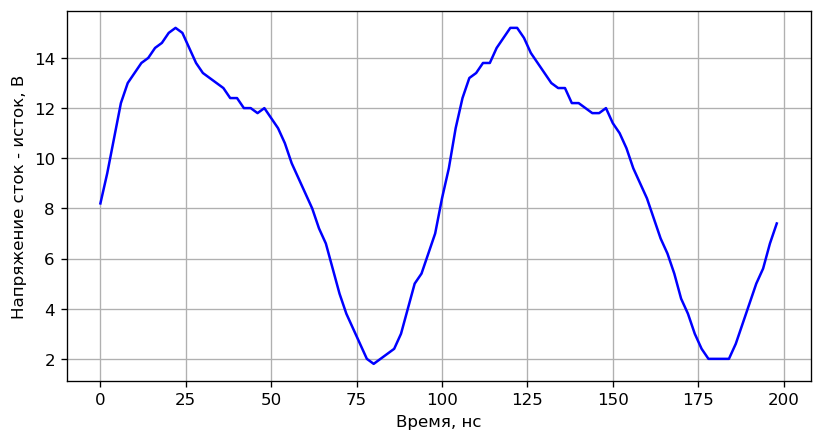

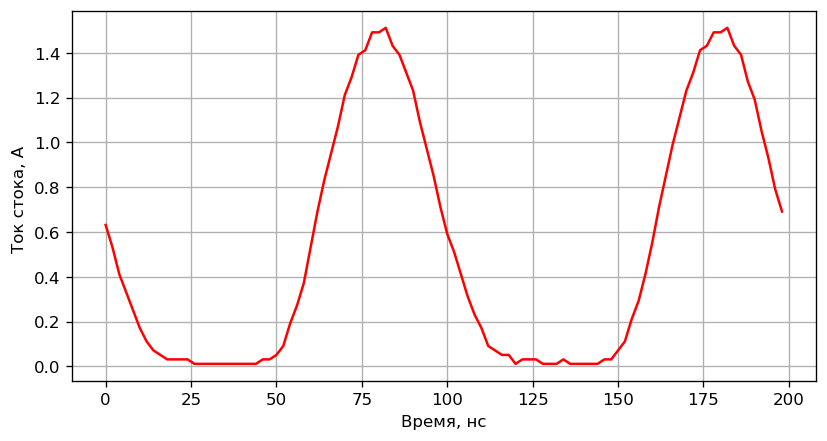

In [326]:
data1 = pd.read_csv('22eksp_nr.csv', index_col= False)
data2 = pd.read_csv('scope_csv_115_0.csv', index_col= False)


NR_ch1 = 9 + 100 * data1.iloc[0:100]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
NR_ch2 = 0.531 + data1.iloc[0:100]['CH2 [V]']

new_xticks = np.arange(0, 201, 25)

# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH1
plt.plot(time_ns, NR_ch1, label='CH1', color='blue')
plt.xlabel('Время, нс')
plt.ylabel('Напряжение сток - исток, В')
plt.grid(True)
plt.xticks(new_xticks)
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH2
plt.plot(time_ns, NR_ch2, label='CH2', color='red')
plt.xlabel('Время, нс')
plt.ylabel('Ток стока, А ')
plt.grid(True)
plt.xticks(new_xticks)
plt.show()


### Перенапряжённый режим

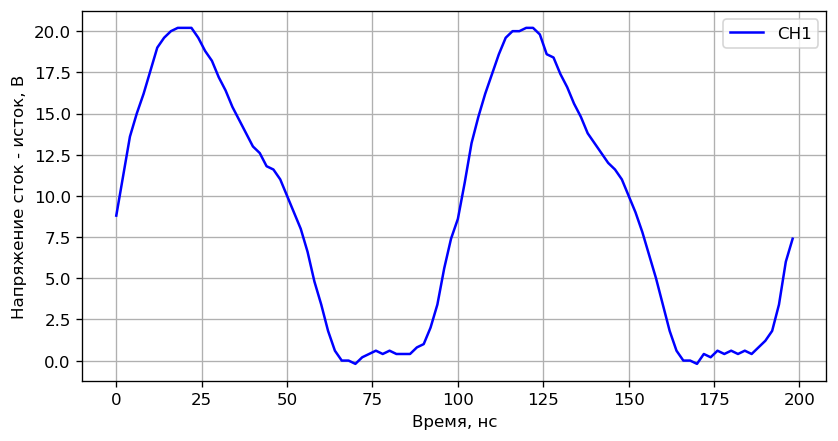

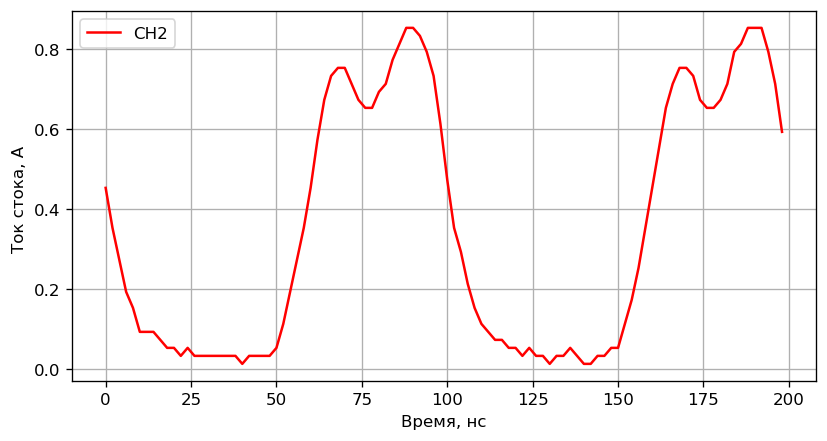

In [327]:
PR_ch1 = 9 + 100 * data2.iloc[0:100]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
PR_ch2 = 0.333 + data2.iloc[0:100]['CH2 [V]']

new_xticks = np.arange(0, 201, 25)


# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH1
plt.plot(time_ns, PR_ch1, label='CH1', color='blue')
plt.xlabel('Время, нс')
plt.ylabel('Напряжение сток - исток, В')
plt.legend()
plt.grid(True)
plt.xticks(new_xticks)
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH2
plt.plot(time_ns, PR_ch2, label='CH2', color='red')
plt.xlabel('Время, нс')
plt.ylabel('Ток стока, А ')
plt.legend()
plt.grid(True)
plt.xticks(new_xticks)
plt.show()

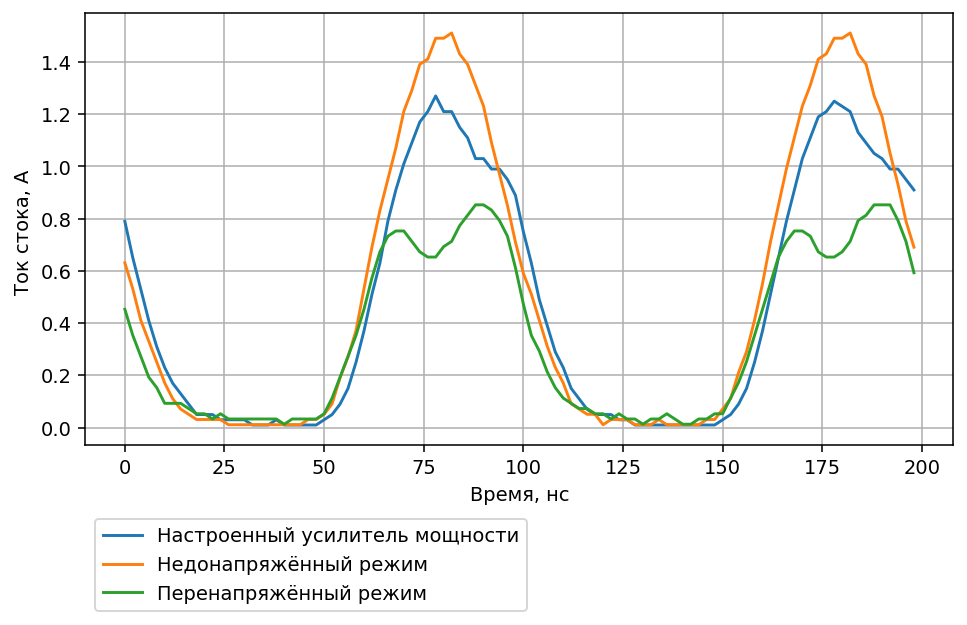

In [328]:
Ic = np.array([ch2, NR_ch2, PR_ch2])
plt.figure(figsize=(8, 4), dpi=140)
plt.grid(True)
plt.xlabel('Время, нс')
plt.ylabel('Ток стока, А ')
plt.legend(['Ic1','Ic2','Ic3'])
plt.show
plt.plot(time_ns, Ic[0], label='Настроенный усилитель мощности')
plt.plot(time_ns, Ic[1], label='Недонапряжённый режим')
plt.plot(time_ns, Ic[2], label='Перенапряжённый режим')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.show()

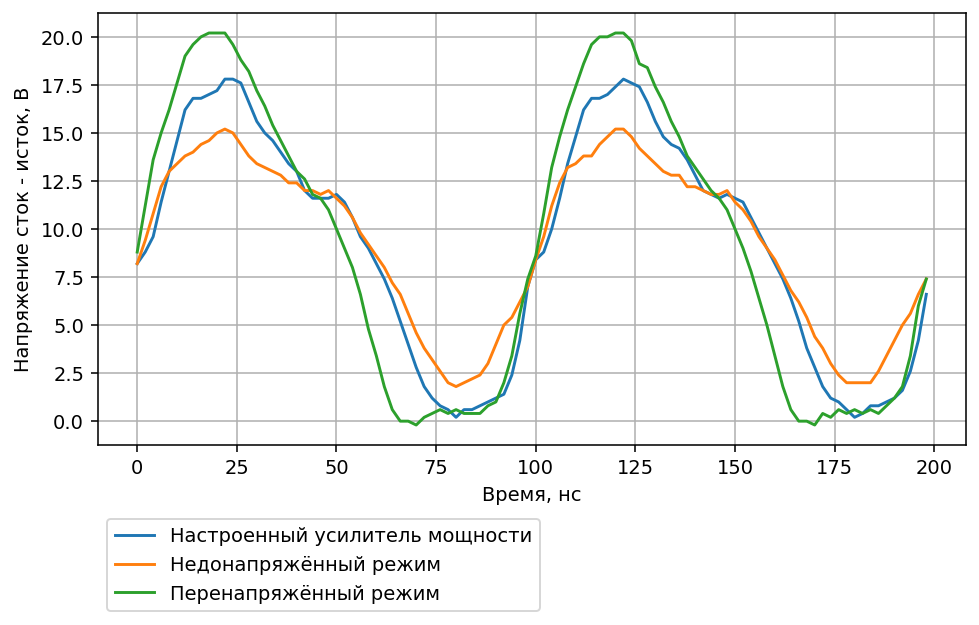

In [329]:
Usi = np.array([ch1, NR_ch1, PR_ch1])
plt.figure(figsize=(8, 4), dpi=140)
plt.grid(True)
plt.xlabel('Время, нс')
plt.ylabel('Напряжение сток - исток, В')
plt.legend(['Ic1','Ic2','Ic3'])
plt.show
plt.plot(time_ns, Usi[0], label='Настроенный усилитель мощности')
plt.plot(time_ns, Usi[1], label='Недонапряжённый режим')
plt.plot(time_ns, Usi[2], label='Перенапряжённый режим')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.show()

### Поиск второй гармоники тока стока Ic2 в недонапряжённом режиме

In [330]:
from scipy.signal import find_peaks

1. DC-компонента (нулевая частота) и Найквистова частота (если количество точек чётное) не должны умножаться на 2, так как они не имеют зеркального отображения в спектре.

2. Все остальные частоты имеют зеркальные пары и их амплитуды должны быть умножены на 2 для корректного отображения.

Чтобы правильно выполнить преобразование Фурье и увидеть гармоники на ожидаемых частотах (10 МГц и 20 МГц), действительно важно, чтобы анализируемый участок данных содержал целое число периодов сигнала.


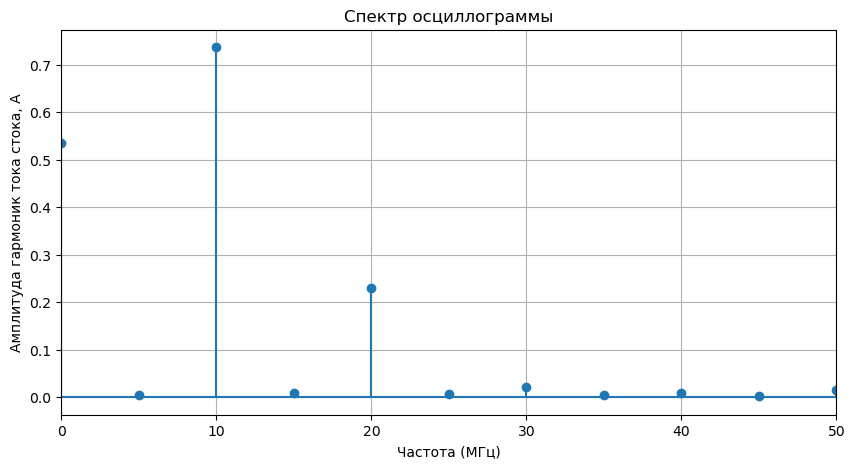

Амплитуда DC-компоненты: 0.534


In [331]:
# Параметры сигнала
frequency = 10e6  # Частота основного сигнала 10 МГц
period = 1 / frequency  # Период основного сигнала (секунды)


# Количество точек на период (в секундах)
points_per_period = int(2*period / discrete_time)

# Убедимся, что количество точек соответствует целому числу периодов
num_periods = 2  # Количество периодов, которые мы хотим захватить
total_points = num_periods * points_per_period  # Всего точек

# Предположим, что NR_ch2 содержит данные осциллограммы
NR_ch2_segment = NR_ch2[:total_points]  # Обрезаем данные до целого числа периодов

# Преобразование Фурье
N = len(NR_ch2_segment)  # Количество точек
yf = np.fft.fft(NR_ch2_segment)
xf = np.fft.fftfreq(N, discrete_time)[:N//2]  # Ось частот (в Гц)

# Масштабирование амплитуд
ampl = np.abs(yf[:N//2]) / N #! Делим все амплитуды на N для нормализации.
ampl[1:-1] *= 2  # Умножаем амплитуды всех гармоник, кроме DC и Найквиста

# Преобразуем частоты в МГц
xf_mhz = xf / 1e6

# Построение графика спектра
plt.figure(figsize=(10, 5))

new_xticks = np.arange(0, np.max(xf_mhz), 10) 
plt.xticks(new_xticks)
plt.xlim(0, 50)
plt.stem(xf_mhz, ampl, basefmt="C0")
plt.title('Спектр осциллограммы')
plt.xlabel('Частота (МГц)')
plt.ylabel('Амплитуда гармоник тока стока, А')
plt.grid(True)
plt.show()

# Вывод амплитуды DC-компоненты для проверки
print(f'Амплитуда DC-компоненты: {ampl[0]}')




In [332]:
# Нахождение основной частоты
peak_idx = np.argmax(ampl[1:]) + 1  # Игнорируем DC-компоненту
fundamental_freq = xf[peak_idx]
print(f'Основная частота: {fundamental_freq} Гц')

# Определение второй гармоники
second_harmonic_freq = 2 * fundamental_freq
print(f'Вторая гармоника: {second_harmonic_freq} Гц')

# Поиск индекса ближайшей частоты к второй гармонике
idx_second = np.argmin(np.abs(xf - second_harmonic_freq))
second_harmonic_actual_freq = xf[idx_second]  # Точная частота из спектра
second_harmonic_amplitude = ampl[idx_second]
print(f'Амплитуда второй гармоники: {second_harmonic_amplitude:.4f}')

Основная частота: 10000000.0 Гц
Вторая гармоника: 20000000.0 Гц
Амплитуда второй гармоники: 0.2305


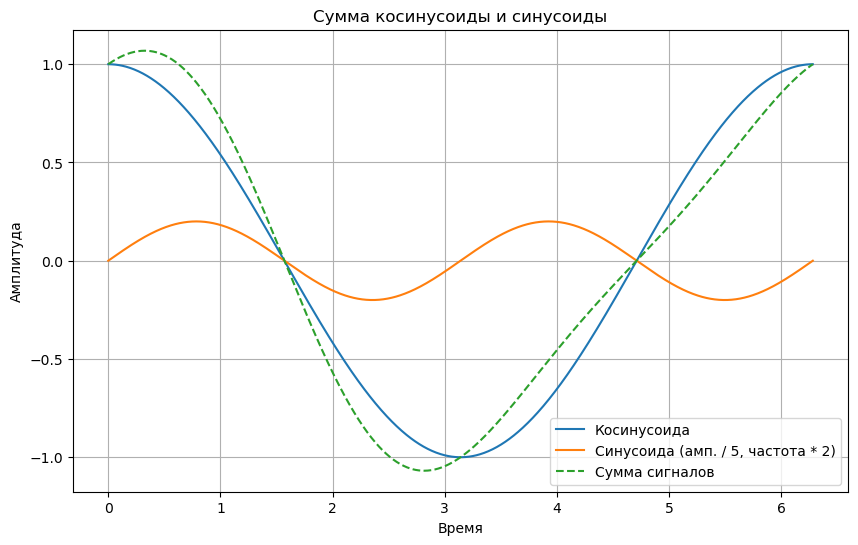

In [333]:
# Параметры сигнала
t = np.linspace(0, 2 * np.pi, 1000)
cos_wave = np.cos(t)
sin_wave = (1/5) * np.sin(2 * t)

# Сумма сигналов
sum_wave = cos_wave + sin_wave

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(t, cos_wave, label='Косинусоида')
plt.plot(t, sin_wave, label='Синусоида (амп. / 5, частота * 2)')
plt.plot(t, sum_wave, label='Сумма сигналов', linestyle='--')

# Настройки графика
plt.title('Сумма косинусоиды и синусоиды')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()